In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

In [2]:
salary_table = pd.read_excel('C:/Users/jason/OneDrive/桌面/東吳作業/資料探勘Python/nbaSalaryStats2122.xlsx')  #匯入資料
salary_table.head(10)  #前10行

,Player,Pos,Salary,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,2711280.0,21,MIA,61,4,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,NaN,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,17073171.0,27,NOP,58,58,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,28103550.0,23,MIA,64,64,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,2641691.0,35,TOT,26,23,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,LaMarcus Aldridge,C,2641691.0,35,SAS,21,18,25.9,5.5,11.8,...,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
6,LaMarcus Aldridge,C,2641691.0,35,BRK,5,5,26.0,5.0,9.6,...,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
7,Ty-Shon Alexander,SG,NaN,22,PHO,15,0,3.1,0.2,0.8,...,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
8,Nickeil Alexander-Walker,SG,3261480.0,22,NOP,46,13,21.9,4.2,10.0,...,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
9,Grayson Allen,SG,4054695.0,25,MEM,50,38,25.2,3.5,8.3,...,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6


In [3]:
salary_table.columns #列出欄位資料

Index(['Player', 'Pos', 'Salary', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
stats21_22 = salary_table[['Player','Pos','Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','Salary','eFG%','2P%', 'FT%','FG%']]
#只要'Player','Pos','Age','MP','PTS','AST','TRB','TOV','BLK','STL','eFG%','Salary' ,'2P%', '3P%','FT%',FG%重新畫分欄位
stats21_22['Salary'] = stats21_22['Salary']/10000 #把薪水改成萬位數單位 

In [5]:
stats21_22

,Player,Pos,Age,MP,PTS,AST,TRB,TOV,BLK,STL,3P%,Salary,eFG%,2P%,FT%,FG%
0,Precious Achiuwa,PF,21,12.1,5.0,0.5,3.4,0.7,0.5,0.3,0.000,271.1280,0.544,0.546,0.509,0.544
1,Jaylen Adams,PG,24,2.6,0.3,0.3,0.4,0.0,0.0,0.0,0.000,NaN,0.125,0.167,NaN,0.125
2,Steven Adams,C,27,27.7,7.6,1.9,8.9,1.3,0.7,0.9,0.000,1707.3171,0.614,0.620,0.444,0.614
3,Bam Adebayo,C,23,33.5,18.7,5.4,9.0,2.6,1.0,1.2,0.250,2810.3550,0.571,0.573,0.799,0.570
4,LaMarcus Aldridge,C,35,25.9,13.5,1.9,4.5,1.0,1.1,0.4,0.388,264.1691,0.525,0.505,0.872,0.473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright,PG,28,25.8,10.0,3.6,3.9,1.3,0.4,1.6,0.398,852.6316,0.536,0.500,0.833,0.462
701,Thaddeus Young,PF,32,24.3,12.1,4.3,6.2,2.0,0.6,1.1,0.267,1419.0000,0.568,0.580,0.628,0.559
702,Trae Young,PG,22,33.7,25.3,9.4,3.9,4.1,0.2,0.8,0.343,832.6471,0.499,0.491,0.886,0.438
703,Cody Zeller,C,28,20.9,9.4,1.8,6.8,1.1,0.4,0.6,0.143,238.9641,0.565,0.598,0.714,0.559


In [6]:
stats21_22['Salary'].describe() #看一下資料分布

count     531.000000
mean      856.801459
std       972.903828
min         0.000000
25%       201.658000
50%       434.760000
75%      1209.756100
max      4578.096600
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Density'>

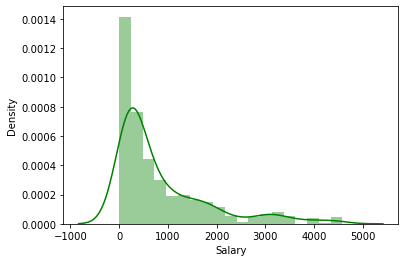

In [7]:
sns.distplot(stats21_22['Salary'],color='Green') #薪水資料分布(大部分集中於500萬上下)

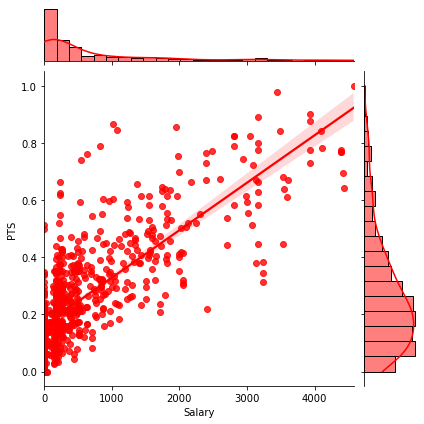

In [30]:
sns.jointplot(x='Salary',y ='PTS',data=stats21_22,color='Red',kind='reg') #薪水和得分的分布關係，呈現正相關，得分越高，薪水越高。

<AxesSubplot:xlabel='3P%', ylabel='Density'>

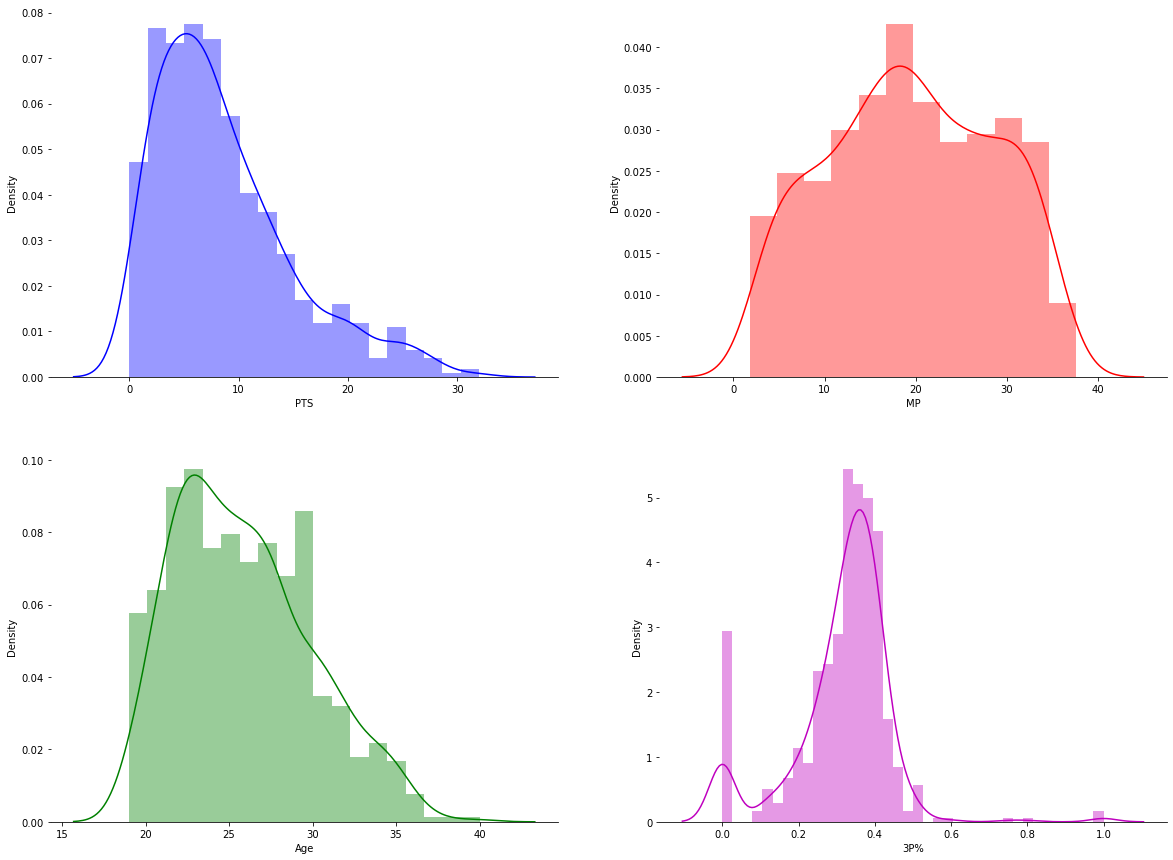

In [9]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.despine(left=True)

# 長條圖
sns.distplot(stats21_22['PTS'], color = "b", ax = axes[0, 0]) #分數的長條圖分布
sns.distplot(stats21_22['MP'], color = "r", ax = axes[0, 1])  #上場時間的長條圖分布
sns.distplot(stats21_22['Age'], color = "g", ax = axes[1, 0]) #年紀的長條圖分布
sns.distplot(stats21_22['3P%'], color = "m", ax = axes[1, 1]) #罰球命中率的長條圖分布

<AxesSubplot:xlabel='3P%', ylabel='Salary'>

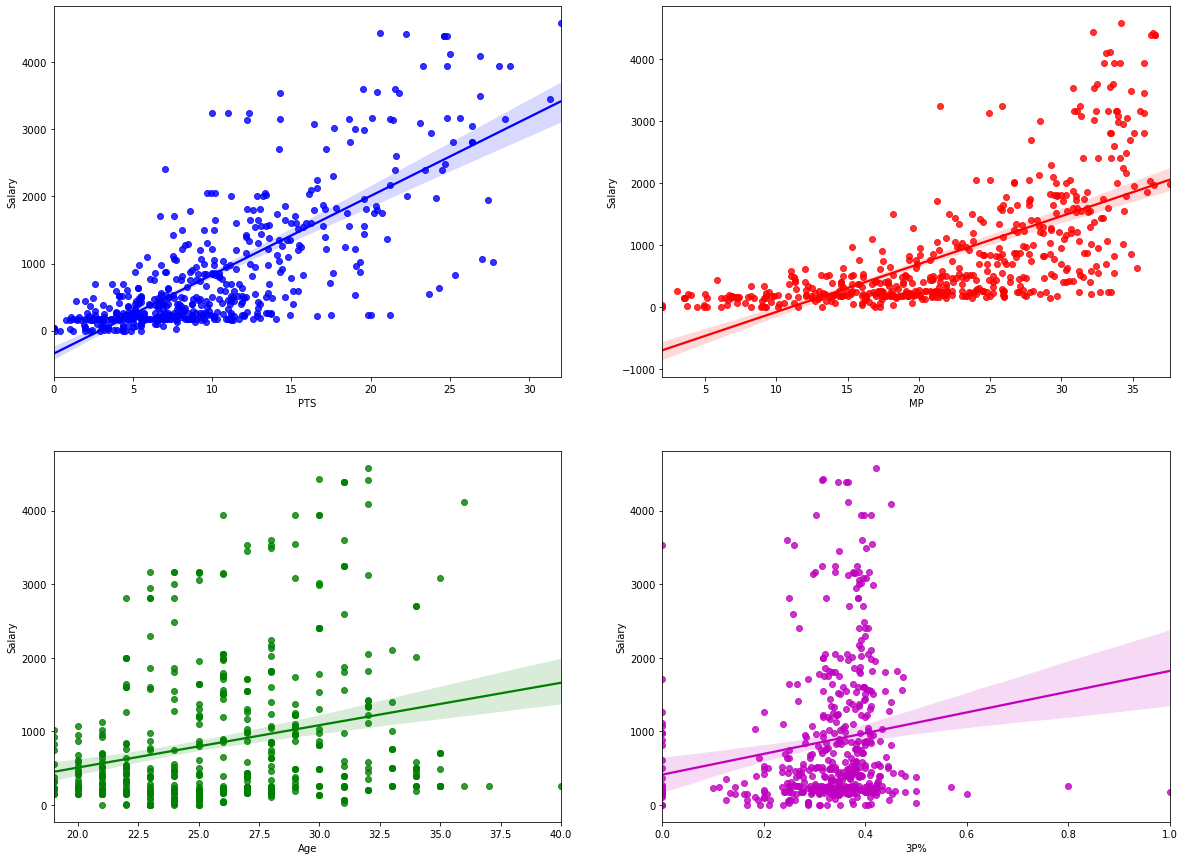

In [10]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))

# 線性回歸圖
sns.regplot(x = stats21_22['PTS'], y = stats21_22['Salary'], color="b", ax=axes[0, 0]) #分數和薪水的關係分布
sns.regplot(x = stats21_22['MP'], y = stats21_22['Salary'], color="r", ax=axes[0, 1])  #上場時間和薪水的關係分布
sns.regplot(x = stats21_22['Age'], y = stats21_22['Salary'], color="g", ax=axes[1, 0]) #年紀和薪水的關係分布
sns.regplot(x = stats21_22['3P%'], y = stats21_22['Salary'], color="m", ax=axes[1, 1]) #3分球和薪水的關係分布 ,皆能看出正相關

<AxesSubplot:xlabel='eFG%', ylabel='Salary'>

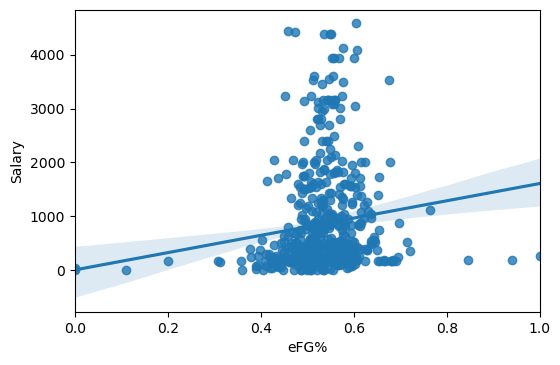

In [11]:
plt.figure(dpi=100)
sns.regplot(x = stats21_22['eFG%'], y = stats21_22['Salary']) 
#有效命中率跟薪水的關係分布
#有效命中率＝（總命中數＋0.5*三分球的命中數）/ 總出手數

<AxesSubplot:xlabel='Pos', ylabel='Salary'>

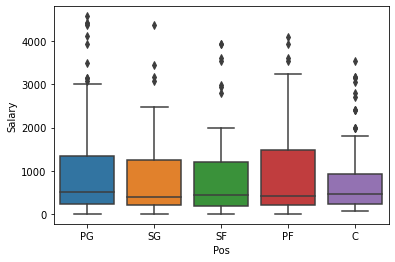

In [12]:
sns.boxplot(x = 'Pos', y = 'Salary', data = stats21_22, order = ['PG', 'SG', 'SF', 'PF', 'C']) 
#每個位置所得的薪水盒子圖

In [13]:
pd.set_option('precision', 4) #顯示四位數
stats21_22.describe()

,Age,MP,PTS,AST,TRB,TOV,BLK,STL,3P%,Salary,eFG%,2P%,FT%,FG%
count,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,670.0000,531.0000,703.0000,699.0000,676.0000,703.0000
mean,25.8709,19.4359,8.6166,1.9336,3.5793,1.0738,0.4162,0.6122,0.3145,856.8015,0.5089,0.5068,0.7519,0.4435
std,4.0950,9.1550,6.2728,1.8140,2.3849,0.8126,0.4089,0.3934,0.1285,972.9038,0.1130,0.1301,0.1466,0.1125
min,19.0000,1.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,23.0000,12.5000,4.0000,0.7000,1.9000,0.5000,0.1000,0.3000,0.2710,201.6580,0.4760,0.4580,0.6828,0.3970
50%,25.0000,19.3000,7.2000,1.4000,3.1000,0.9000,0.3000,0.6000,0.3380,434.7600,0.5200,0.5100,0.7750,0.4390
75%,28.0000,26.9000,11.7000,2.5000,4.8000,1.4000,0.6000,0.9000,0.3880,1209.7561,0.5640,0.5730,0.8450,0.4955
max,40.0000,37.6000,32.0000,11.7000,14.3000,5.0000,3.4000,2.1000,1.0000,4578.0966,1.0000,1.0000,1.0000,1.0000


In [31]:
print('Skew: ' + str(stats21_22['Salary'].skew())) #圖形是右偏(正偏)，表示有少數幾筆資料很大，故平均數>中位數。
print('kurt: ' + str(stats21_22['Salary'].kurt())) #資料分布較為陡峭

Skew: 2.0700481034023426
kurt: 4.05151527286516


In [15]:
scaler = StandardScaler()
stats21_22[['Salary', 'Age', 'PTS']] = scaler.fit_transform(stats21_22[['Salary', 'Age', 'PTS']])
stats21_22[['Salary', 'Age', 'PTS']] #標準化這三個特徵

,Salary,Age,PTS
0,-0.6026,-1.1903,-0.5770
1,NaN,-0.4572,-1.3268
2,0.8750,0.2759,-0.1622
3,2.0099,-0.7016,1.6086
4,-0.6097,2.2309,0.7791
...,...,...,...
700,-0.0043,0.5203,0.2207
701,0.5784,1.4978,0.5557
702,-0.0249,-0.9460,2.6615
703,-0.6356,0.5203,0.1250


In [16]:
scaler = MinMaxScaler()
stats21_22[['Salary', 'Age', 'PTS']] = scaler.fit_transform(stats21_22[['Salary', 'Age', 'PTS']])
stats21_22[['Salary', 'Age', 'PTS']] #重新縮放範圍到[0, 1]或[-1, 1]

,Salary,Age,PTS
0,0.0592,0.0952,0.1562
1,NaN,0.2381,0.0094
2,0.3729,0.3810,0.2375
3,0.6139,0.1905,0.5844
4,0.0577,0.7619,0.4219
...,...,...,...
700,0.1862,0.4286,0.3125
701,0.3100,0.6190,0.3781
702,0.1819,0.1429,0.7906
703,0.0522,0.4286,0.2938


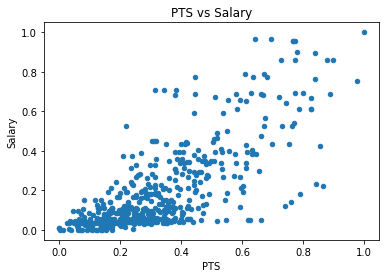

In [17]:
stats21_22.plot(kind='scatter', title='PTS vs Salary', x='PTS', y='Salary')
plt.show() 
#標準化後分數跟薪水個分布(較清晰)
#分數越高，薪水越高

In [18]:
salary_table = pd.read_excel('C:/Users/jason/OneDrive/桌面/東吳作業/資料探勘Python/nbaSalaryStats2122.xlsx') #重新匯入資料(由於前面標準化過資料,因此需重新匯入)
stats = salary_table[['Player','Pos','Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','Salary','eFG%','2P%', 'FT%','FG%']]
stats['Salary'] = stats['Salary']/10000 #把薪水改成萬位數單位
stats.loc[stats['Pos'] == 'PF-C','Pos'] = 'PF'   #把球員的位置重新整理，有打兩個位置的球員，把他歸類到一個位置
stats.loc[stats['Pos'] == 'PF-SF','Pos'] = 'PF'
stats.loc[stats['Pos'] == 'C-PF','Pos'] = 'C'
stats.loc[stats['Pos'] == 'SG-PG','Pos'] = 'SG'
stats.loc[stats['Pos'] == 'SG-SF','Pos'] = 'SG'
stats.loc[stats['Pos'] == 'SF-PF','Pos'] = 'SF'
stats.loc[stats['Pos'] == 'SF-SG','Pos'] = 'SF'
stats.loc[stats['Pos'] == 'PG-SG','Pos'] = 'PG'
positions = pd.get_dummies(stats['Pos'])       #把位置數值轉化為布林值，可用於預測模型，來預測位置對薪水的影響。
stats = pd.concat([stats, positions], axis=1)  #把表格跟位置合併
stats21_22 = stats.fillna(value=0)             #空值補0

In [19]:
data = stats21_22[['PTS','Salary','MP','eFG%']]  #抓出['PTS','Salary','MP','eFG%']這四個值
data  

,PTS,Salary,MP,eFG%
0,5.0,271.1280,12.1,0.544
1,0.3,0.0000,2.6,0.125
2,7.6,1707.3171,27.7,0.614
3,18.7,2810.3550,33.5,0.571
4,13.5,264.1691,25.9,0.525
...,...,...,...,...
700,10.0,852.6316,25.8,0.536
701,12.1,1419.0000,24.3,0.568
702,25.3,832.6471,33.7,0.499
703,9.4,238.9641,20.9,0.565


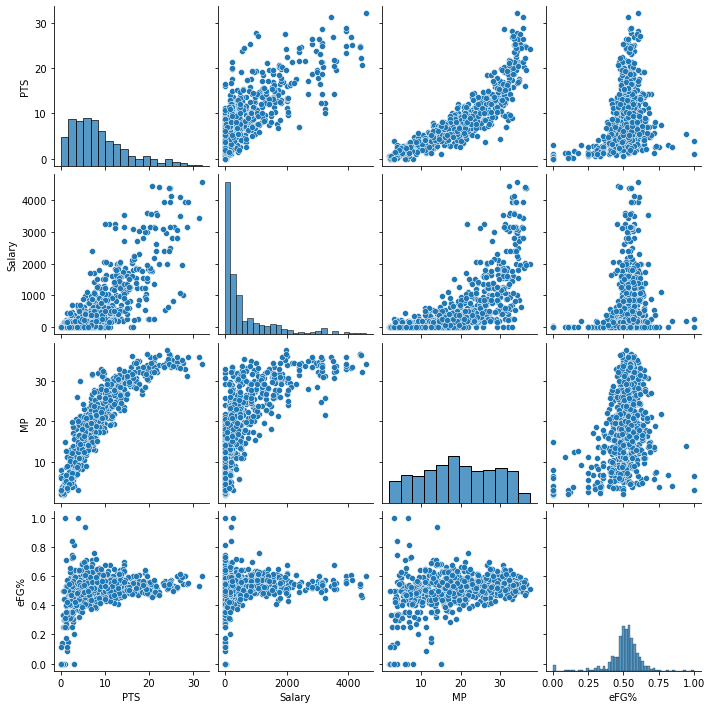

In [20]:
sns.pairplot(data)
plt.show() #對比下個別分布

In [21]:
stats21_22['AST/TOV'] = stats21_22['AST']/stats21_22['TOV']
stats21_22.head()  #助功率/失誤率 助攻失誤比 

,Player,Pos,Age,MP,PTS,AST,TRB,TOV,BLK,STL,...,eFG%,2P%,FT%,FG%,C,PF,PG,SF,SG,AST/TOV
0,Precious Achiuwa,PF,21,12.1,5.0,0.5,3.4,0.7,0.5,0.3,...,0.544,0.546,0.509,0.544,0,1,0,0,0,0.7143
1,Jaylen Adams,PG,24,2.6,0.3,0.3,0.4,0.0,0.0,0.0,...,0.125,0.167,0.000,0.125,0,0,1,0,0,inf
2,Steven Adams,C,27,27.7,7.6,1.9,8.9,1.3,0.7,0.9,...,0.614,0.620,0.444,0.614,1,0,0,0,0,1.4615
3,Bam Adebayo,C,23,33.5,18.7,5.4,9.0,2.6,1.0,1.2,...,0.571,0.573,0.799,0.570,1,0,0,0,0,2.0769
4,LaMarcus Aldridge,C,35,25.9,13.5,1.9,4.5,1.0,1.1,0.4,...,0.525,0.505,0.872,0.473,1,0,0,0,0,1.9000


<AxesSubplot:xlabel='AST/TOV', ylabel='Salary'>

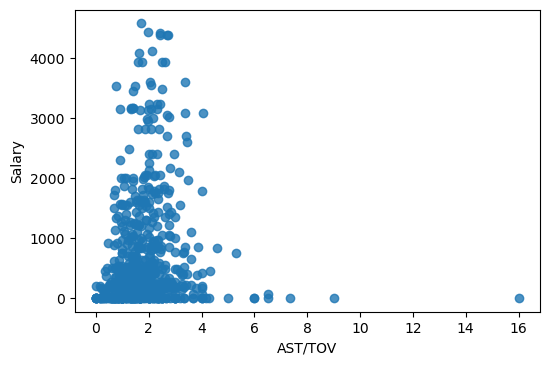

In [22]:
plt.figure(dpi=100)
sns.regplot(x = stats21_22['AST/TOV'], y = stats21_22['Salary']) 
#助攻失誤比跟薪水的關係分布
#助攻失誤比 = 一次助攻會有幾次失誤

In [23]:
scaler = StandardScaler()
stats21_22[['Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','eFG%','2P%','FT%','FG%','C','PF','PG','SF','SG']] = scaler.fit_transform(stats21_22[['Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','eFG%','2P%','FT%','FG%','C','PF','PG','SF','SG']])
stats21_22[['Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','eFG%','2P%','FT%','FG%','C','PF','PG','SF','SG']] 
#標準化這18個特徵

,Age,MP,PTS,AST,TRB,TOV,BLK,STL,3P%,eFG%,2P%,FT%,FG%,C,PF,PG,SF,SG
0,-1.1903,-0.8019,-0.5770,-0.7909,-0.0752,-0.4603,0.2051,-0.7941,-2.0956,0.3150,0.3167,-1.0237,0.8869,-0.4978,1.9567,-0.4710,-0.4642,-0.555
1,-0.4572,-1.8403,-1.3268,-0.9012,-1.3341,-1.3224,-1.0184,-1.5571,-2.0956,-3.2969,-2.4390,-3.4819,-2.7644,-0.4978,-0.5111,2.1232,-0.4642,-0.555
2,0.2759,0.9033,-0.1622,-0.0185,2.2326,0.2786,0.6945,0.7320,-2.0956,0.9184,0.8547,-1.3376,1.4969,2.0089,-0.5111,-0.4710,-0.4642,-0.555
3,-0.7016,1.5373,1.6086,1.9123,2.2746,1.8796,1.4287,1.4951,-0.3430,0.5477,0.5130,0.3769,1.1134,2.0089,-0.5111,-0.4710,-0.4642,-0.555
4,2.2309,0.7066,0.7791,-0.0185,0.3863,-0.0908,1.6734,-0.5397,0.6245,0.1512,0.0186,0.7294,0.2682,2.0089,-0.5111,-0.4710,-0.4642,-0.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.5203,0.6956,0.2207,0.9193,0.1346,0.2786,-0.0396,2.5125,0.6946,0.2460,-0.0178,0.5411,0.1723,-0.4978,-0.5111,2.1232,-0.4642,-0.555
701,1.4978,0.5317,0.5557,1.3054,1.0997,1.1407,0.4498,1.2407,-0.2238,0.5219,0.5639,-0.4490,1.0176,-0.4978,1.9567,-0.4710,-0.4642,-0.555
702,-0.9460,1.5592,2.6615,4.1189,0.1346,3.7269,-0.5290,0.4777,0.3090,-0.0729,-0.0832,0.7970,-0.0368,-0.4978,-0.5111,2.1232,-0.4642,-0.555
703,0.5203,0.1600,0.1250,-0.0737,1.3514,0.0323,-0.0396,-0.0310,-1.0931,0.4960,0.6947,-0.0336,1.0176,2.0089,-0.5111,-0.4710,-0.4642,-0.555


In [24]:
scaler = MinMaxScaler()
stats21_22[['Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','eFG%','2P%','FT%','FG%','C','PF','PG','SF','SG']] = scaler.fit_transform(stats21_22[['Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','eFG%','2P%','FT%','FG%','C','PF','PG','SF','SG']])
stats21_22[['Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','eFG%','2P%','FT%','FG%','C','PF','PG','SF','SG']] 
#讓他們區間於1~-1之間

,Age,MP,PTS,AST,TRB,TOV,BLK,STL,3P%,eFG%,2P%,FT%,FG%,C,PF,PG,SF,SG
0,0.0952,0.2877,0.1562,0.0427,0.2378,0.14,0.1471,0.1429,0.000,0.544,0.546,0.509,0.544,0.0,1.0,0.0,0.0,0.0
1,0.2381,0.0223,0.0094,0.0256,0.0280,0.00,0.0000,0.0000,0.000,0.125,0.167,0.000,0.125,0.0,0.0,1.0,0.0,0.0
2,0.3810,0.7235,0.2375,0.1624,0.6224,0.26,0.2059,0.4286,0.000,0.614,0.620,0.444,0.614,1.0,0.0,0.0,0.0,0.0
3,0.1905,0.8855,0.5844,0.4615,0.6294,0.52,0.2941,0.5714,0.250,0.571,0.573,0.799,0.570,1.0,0.0,0.0,0.0,0.0
4,0.7619,0.6732,0.4219,0.1624,0.3147,0.20,0.3235,0.1905,0.388,0.525,0.505,0.872,0.473,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.4286,0.6704,0.3125,0.3077,0.2727,0.26,0.1176,0.7619,0.398,0.536,0.500,0.833,0.462,0.0,0.0,1.0,0.0,0.0
701,0.6190,0.6285,0.3781,0.3675,0.4336,0.40,0.1765,0.5238,0.267,0.568,0.580,0.628,0.559,0.0,1.0,0.0,0.0,0.0
702,0.1429,0.8911,0.7906,0.8034,0.2727,0.82,0.0588,0.3810,0.343,0.499,0.491,0.886,0.438,0.0,0.0,1.0,0.0,0.0
703,0.4286,0.5335,0.2938,0.1538,0.4755,0.22,0.1176,0.2857,0.143,0.565,0.598,0.714,0.559,1.0,0.0,0.0,0.0,0.0


In [25]:
colnames = list(stats21_22) 
colnames.remove('Salary')  #去掉有string的數值欄位，好用於預測模型
colnames.remove('Player')
colnames.remove('Pos')

In [26]:
colnames

['Age',
 'MP',
 'PTS',
 'AST',
 'TRB',
 'TOV',
 'BLK',
 'STL',
 '3P%',
 'eFG%',
 '2P%',
 'FT%',
 'FG%',
 'C',
 'PF',
 'PG',
 'SF',
 'SG',
 'AST/TOV']

In [27]:
stats21_22

,Player,Pos,Age,MP,PTS,AST,TRB,TOV,BLK,STL,...,eFG%,2P%,FT%,FG%,C,PF,PG,SF,SG,AST/TOV
0,Precious Achiuwa,PF,0.0952,0.2877,0.1562,0.0427,0.2378,0.14,0.1471,0.1429,...,0.544,0.546,0.509,0.544,0.0,1.0,0.0,0.0,0.0,0.7143
1,Jaylen Adams,PG,0.2381,0.0223,0.0094,0.0256,0.0280,0.00,0.0000,0.0000,...,0.125,0.167,0.000,0.125,0.0,0.0,1.0,0.0,0.0,inf
2,Steven Adams,C,0.3810,0.7235,0.2375,0.1624,0.6224,0.26,0.2059,0.4286,...,0.614,0.620,0.444,0.614,1.0,0.0,0.0,0.0,0.0,1.4615
3,Bam Adebayo,C,0.1905,0.8855,0.5844,0.4615,0.6294,0.52,0.2941,0.5714,...,0.571,0.573,0.799,0.570,1.0,0.0,0.0,0.0,0.0,2.0769
4,LaMarcus Aldridge,C,0.7619,0.6732,0.4219,0.1624,0.3147,0.20,0.3235,0.1905,...,0.525,0.505,0.872,0.473,1.0,0.0,0.0,0.0,0.0,1.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright,PG,0.4286,0.6704,0.3125,0.3077,0.2727,0.26,0.1176,0.7619,...,0.536,0.500,0.833,0.462,0.0,0.0,1.0,0.0,0.0,2.7692
701,Thaddeus Young,PF,0.6190,0.6285,0.3781,0.3675,0.4336,0.40,0.1765,0.5238,...,0.568,0.580,0.628,0.559,0.0,1.0,0.0,0.0,0.0,2.1500
702,Trae Young,PG,0.1429,0.8911,0.7906,0.8034,0.2727,0.82,0.0588,0.3810,...,0.499,0.491,0.886,0.438,0.0,0.0,1.0,0.0,0.0,2.2927
703,Cody Zeller,C,0.4286,0.5335,0.2938,0.1538,0.4755,0.22,0.1176,0.2857,...,0.565,0.598,0.714,0.559,1.0,0.0,0.0,0.0,0.0,1.6364


In [28]:
y = stats21_22['Salary'] #建立模型，預測薪水
X = stats21_22[colnames] #變數為各個欄位
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
lm = LinearRegression() #線性回歸
lm.fit(X_train,y_train) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print('相關係數: \n',lm.coef_) 

相關係數: 
 [ 5.16297256e+02 -8.11744896e+02  3.80972105e+03  2.16589353e+03
  6.71037035e+02 -1.07175875e+03  7.09058972e+02 -1.38323115e+02
 -2.43440328e+02  9.58990157e+02 -1.36683184e+02 -1.63674256e+02
 -1.25976892e+03 -6.60149841e+16 -6.60149841e+16 -6.60149841e+16
 -6.60149841e+16 -6.60149841e+16]


In [ ]:
highest = np.argmax(lm.coef_)
value = np.amax(lm.coef_)
print(value)
var = colnames[highest]  #得分對於薪水最相關
print(var)


3809.721047570638
PTS


In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)  #決策樹模型

DecisionTreeRegressor()

In [ ]:
# 將salary的資料放入y的變數中
y = stats21_22.Salary
# 選擇需要的feature
data_features = ['Age','MP','PTS','AST','TRB','TOV','BLK','STL','3P%','eFG%','2P%','FT%','FG%','C','PF','PG','SF','SG']
# 將選擇的feature放入x的變數中
X = stats21_22[data_features]
# 原資料為數值，describe可以將這些資料轉為count, mean, std, min...
X.describe()

,Age,MP,PTS,AST,TRB,TOV,BLK,STL,3P%,eFG%,2P%,FT%,FG%,C,PF,PG,SF,SG
count,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000,705.0000
mean,0.3272,0.4926,0.2693,0.1653,0.2503,0.2148,0.1224,0.2915,0.2989,0.5075,0.5024,0.7210,0.4422,0.1986,0.2071,0.1816,0.1773,0.2355
std,0.1950,0.2557,0.1960,0.1550,0.1668,0.1625,0.1203,0.1874,0.1427,0.1161,0.1376,0.2072,0.1148,0.3992,0.4055,0.3858,0.3822,0.4246
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1905,0.2989,0.1250,0.0598,0.1329,0.1000,0.0294,0.1429,0.2500,0.4760,0.4550,0.6670,0.3960,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.2857,0.4888,0.2250,0.1197,0.2168,0.1800,0.0882,0.2857,0.3330,0.5200,0.5090,0.7690,0.4390,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.4286,0.7011,0.3656,0.2137,0.3357,0.2800,0.1765,0.4286,0.3860,0.5640,0.5730,0.8420,0.4950,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
# 定義model，使用random_state來確保每次產生的結果都是一樣
data_model = DecisionTreeRegressor(random_state=0)
# Fit模型
data_model.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
print("每個特徵對薪水的影響程度:")
print(X)
print("預測結果:")
print(data_model.predict(X.head()))

每個特徵對薪水的影響程度:
        Age      MP     PTS     AST     TRB   TOV     BLK     STL    3P%  \
0    0.0952  0.2877  0.1562  0.0427  0.2378  0.14  0.1471  0.1429  0.000   
1    0.2381  0.0223  0.0094  0.0256  0.0280  0.00  0.0000  0.0000  0.000   
2    0.3810  0.7235  0.2375  0.1624  0.6224  0.26  0.2059  0.4286  0.000   
3    0.1905  0.8855  0.5844  0.4615  0.6294  0.52  0.2941  0.5714  0.250   
4    0.7619  0.6732  0.4219  0.1624  0.3147  0.20  0.3235  0.1905  0.388   
..      ...     ...     ...     ...     ...   ...     ...     ...    ...   
700  0.4286  0.6704  0.3125  0.3077  0.2727  0.26  0.1176  0.7619  0.398   
701  0.6190  0.6285  0.3781  0.3675  0.4336  0.40  0.1765  0.5238  0.267   
702  0.1429  0.8911  0.7906  0.8034  0.2727  0.82  0.0588  0.3810  0.343   
703  0.4286  0.5335  0.2938  0.1538  0.4755  0.22  0.1176  0.2857  0.143   
704  0.1905  0.5726  0.2812  0.1111  0.5035  0.22  0.2647  0.1429  0.250   

      eFG%    2P%    FT%    FG%    C   PF   PG   SF   SG  
0    0.544  0.